## Installations and Requirements

In [ ]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

# Imports

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

# Read Image

### Read image.jpg from the folder (using OpenCV)

In [3]:
image_bgr = cv2.imread('./image.jpg')

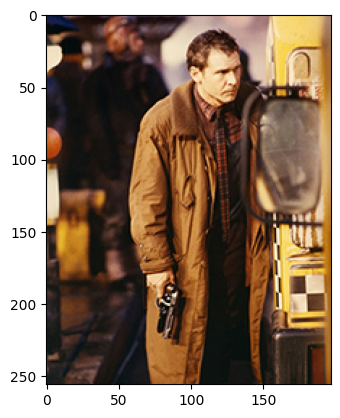

In [7]:
plt.imshow((image := cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)));

### Convert it to Gray (using OpenCV)

In [77]:
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Pyramid Representations

### Implement & Apply Gaussian Pyramid (using OpenCV)

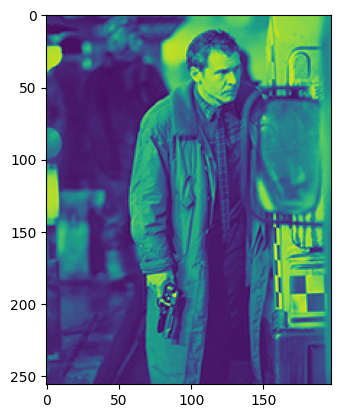

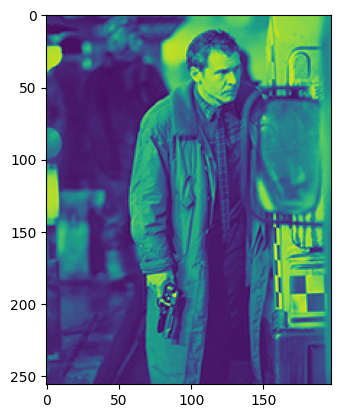

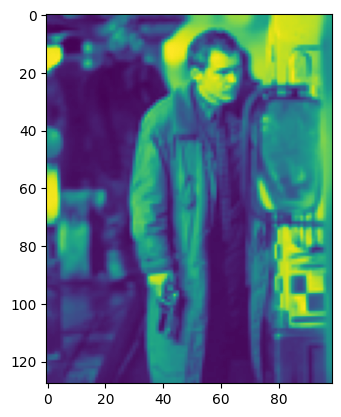

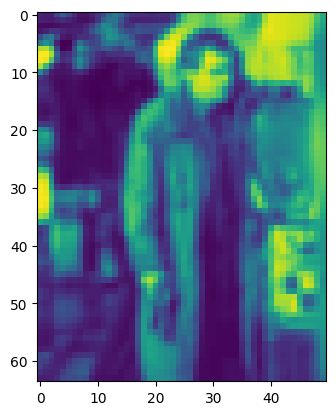

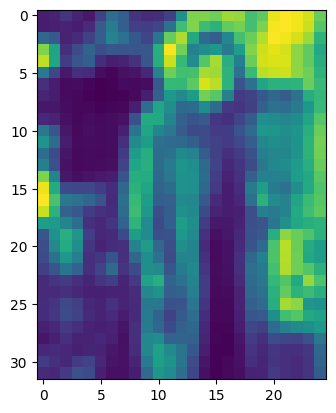

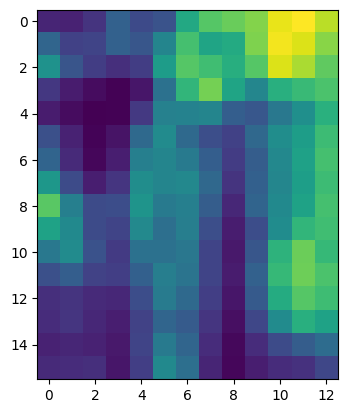

In [78]:
gaussian_pyramid = [image]
plt.imshow(gaussian_pyramid[0]);
plt.show()

for i in range(5):
    gaussian_pyramid.append(cv2.pyrDown(gaussian_pyramid[-1]))
    plt.imshow(gaussian_pyramid[i]);
    plt.show()

### Implement & Apply Laplacian Pyramid (using OpenCV)

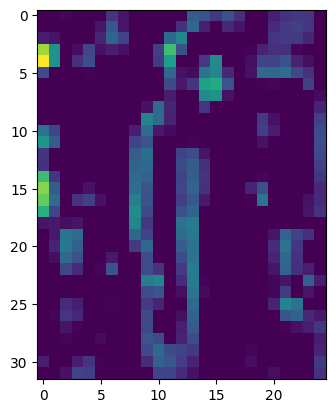

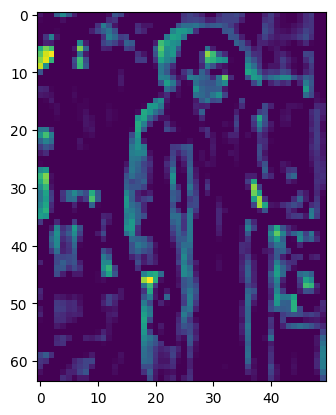

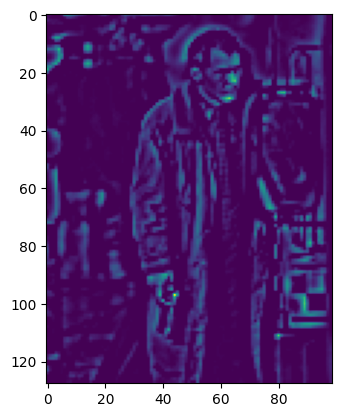

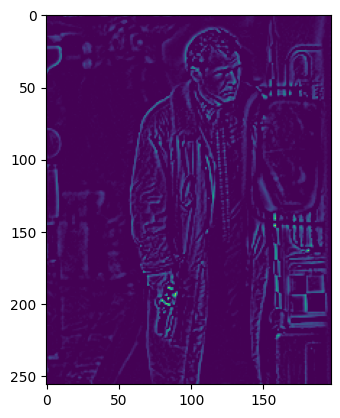

In [79]:
laplacian_pyramid = [gaussian_pyramid[-1]]
for i in range(4, 0, -1):
    expanded = cv2.pyrUp(gaussian_pyramid[i])
    expanded = cv2.resize(expanded, (gaussian_pyramid[i - 1].shape[1], gaussian_pyramid[i - 1].shape[0]))
    laplacian = cv2.subtract(gaussian_pyramid[i - 1], expanded)
    laplacian_pyramid.append(laplacian)
    plt.imshow(laplacian)
    plt.show()

# Pyramid Operations

### Implement Template Matching Using Gaussian Pyramid (using OpenCV)

In [80]:
def template_matching_gaussian_pyramid(img, template):
    res = cv2.matchTemplate(img, template, cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    w, h = template.shape[::-1]
    top_left = min_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    img_out = cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img_out,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.show()

    plt.imshow(img_out)

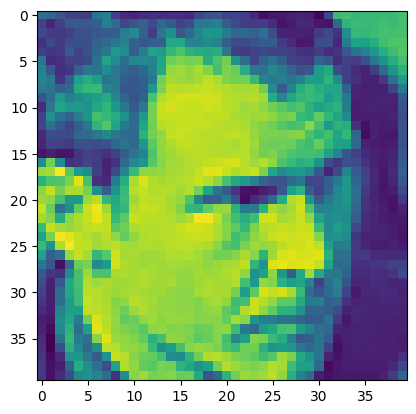

In [81]:
plt.imshow(image[20:60, 100:140]);

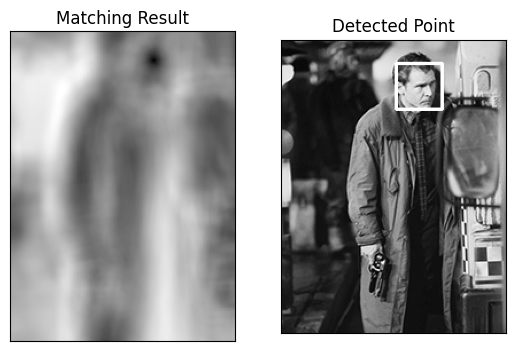

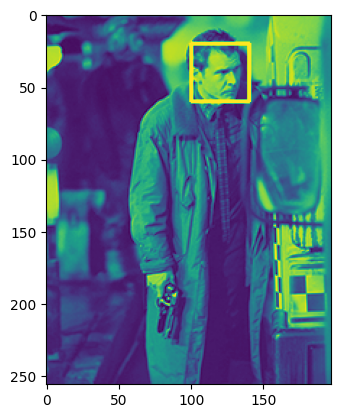

In [82]:
template_matching_gaussian_pyramid(image.copy(), image[20:60, 100:140].copy())

### Implement Image Blending Using Laplacian Pyramid (using OpenCV)

In [94]:
def image_blending(image1, image2):
    
    mask = np.zeros_like(image)
    masked_area = image.shape[0], int(image.shape[1]/2)
    mask[:masked_area[0], :masked_area[1]] += np.ones(masked_area, dtype="uint8")

    # Generate Laplacian pyramids for both images and the mask
    image1_pyramid = [image1]
    image2_pyramid = [image2]
    mask_pyramid = [mask]

    for _ in range(5):  # You can adjust the number of levels as needed
        image1 = cv2.pyrDown(image1)
        image1_pyramid.append(image1)

        image2 = cv2.pyrDown(image2)
        image2_pyramid.append(image2)

        mask = cv2.pyrDown(mask)
        mask_pyramid.append(mask)

    # Generate Laplacian pyramids for the images
    laplacian_pyramid1 = [image1_pyramid[-1]]
    laplacian_pyramid2 = [image2_pyramid[-1]]

    for i in range(4, 0, -1):  # Starting from the second-to-last level and going up
        expanded1 = cv2.pyrUp(image1_pyramid[i])
        expanded1 = cv2.resize(expanded1, (image1_pyramid[i - 1].shape[1], image1_pyramid[i - 1].shape[0]))
        laplacian1 = cv2.subtract(image1_pyramid[i - 1], expanded1)
        laplacian_pyramid1.append(laplacian1)

        expanded2 = cv2.pyrUp(image2_pyramid[i])
        expanded2 = cv2.resize(expanded2, (image2_pyramid[i - 1].shape[1], image2_pyramid[i - 1].shape[0]))
        laplacian2 = cv2.subtract(image2_pyramid[i - 1], expanded2)
        laplacian_pyramid2.append(laplacian2)

    # Generate Gaussian pyramid for the mask
    gaussian_mask_pyramid = [mask_pyramid[-1]]
    for i in range(4, 0, -1):  # Starting from the second-to-last level and going up
        expanded_mask = cv2.pyrUp(mask_pyramid[i])
        expanded_mask = cv2.resize(expanded_mask, (mask_pyramid[i - 1].shape[1], mask_pyramid[i - 1].shape[0]))
        gaussian_mask_pyramid.append(expanded_mask)

    # Blend the Laplacian pyramids using the mask
    blended_laplacian_pyramid = []
    for laplacian1, laplacian2, gaussian_mask in zip(laplacian_pyramid1, laplacian_pyramid2, gaussian_mask_pyramid):
        blended_laplacian = (gaussian_mask * laplacian1) + ((1 - gaussian_mask) * laplacian2)
        blended_laplacian_pyramid.append(blended_laplacian)

    # Reconstruct the blended image
    blended_image = blended_laplacian_pyramid[0]
    for i in range(1, len(blended_laplacian_pyramid)):
        expanded_blended = cv2.pyrUp(blended_image)
        expanded_blended = cv2.resize(expanded_blended, (blended_laplacian_pyramid[i].shape[1], blended_laplacian_pyramid[i].shape[0]))
        blended_image = cv2.add(expanded_blended, blended_laplacian_pyramid[i])


    # Display the original images and the blended result using plt.imshow
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 4, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title('Image 1')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title('Image 2')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
    plt.title('Blended Result')
    plt.axis('off')

    plt.show()

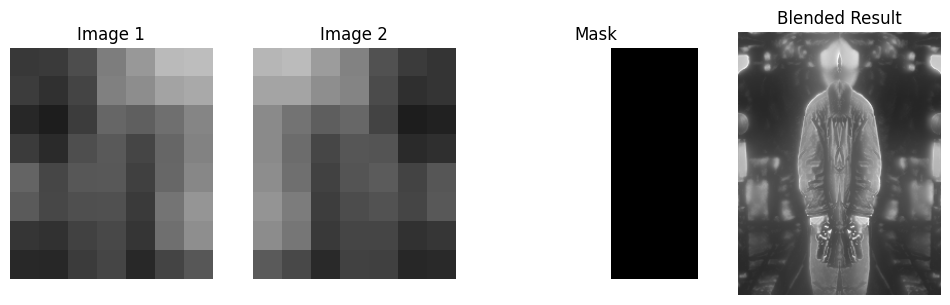

In [95]:
image_blending(image, image[:, ::-1])